In [1]:
#Imports y herramientas varias

import matplotlib.pyplot as plt
import numpy as np
import pandas as pnd
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.feature_selection import mutual_info_classif
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor

In [2]:
#Importar datos originales
path = "Datos/"

clientes = pnd.read_excel(path + "CREDITRISK_RAW.xlsx")

In [8]:
#Exploración de atributos
for key in clientes.keys():
    print "Atributo:", key
    print "\tTipo:", clientes[key].dtype

Atributo: ID
	Tipo: int64
Atributo: GENERO
	Tipo: object
Atributo: RENTA
	Tipo: float64
Atributo: EDAD
	Tipo: float64
Atributo: NIV_EDUC
	Tipo: object
Atributo: E_CIVIL
	Tipo: object
Atributo: COD_OFI
	Tipo: int64
Atributo: COD_COM
	Tipo: object
Atributo: CIUDAD
	Tipo: object
Atributo: Crédito_1
	Tipo: int64
Atributo: Crédito_2
	Tipo: int64
Atributo: Crédito_3
	Tipo: float64
Atributo: Crédito_4
	Tipo: int64
Atributo: Monto solicitado
	Tipo: float64
Atributo: Días de Mora
	Tipo: int64
Atributo: Monto Deuda Promedio
	Tipo: int64
Atributo: Número de meses inactivo
	Tipo: int64
Atributo: numero de cuotas
	Tipo: int64
Atributo: Aval
	Tipo: object
Atributo: PAGA
	Tipo: object


In [4]:
#Extracción de clientes con algún dato en blanco
empty_attribute_clients = clientes[clientes.isnull().any(axis=1)]
clean_clients = clientes[~clientes.isnull().any(axis=1)]

In [5]:
print len(clientes)
print len(clean_clients)
print len(empty_attribute_clients)

2294
2240
54


In [11]:
llaves = clean_clients.keys()

for j in range(len(llaves)):
    if clean_clients[llaves[j]].dtype == 'int64' or clean_clients[llaves[j]].dtype == 'float64':
        continue
    if llaves[j] in ['id']:
        continue
    values = clean_clients[llaves[j]].unique()
    dic = {}
    for i in range(len(values)):
        dic[values[i]] = i
    print "Translation:"
    print ""

    clean_clients[llaves[j]] = clean_clients[llaves[j]].apply(lambda x: dic[x])

#Paga: 0, No Paga: 1

/Users/synaptic/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [27]:
clean_clients

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,Crédito_1,Crédito_2,Crédito_3,Crédito_4,Monto solicitado,Días de Mora,Monto Deuda Promedio,Número de meses inactivo,numero de cuotas,Aval,PAGA
0,1,0,463000.0,55.0,0,0,27,0,0,0,-4030,0.0,292673,142.0,0,81,1,18,0,0
1,2,0,1200000.0,59.0,0,0,121,0,0,0,0,27797549.0,0,16.0,0,34519,1,60,0,1
2,3,0,526000.0,49.0,1,1,59,1,1,0,750000,0.0,0,0.0,0,8016,0,14,0,1
3,4,1,1500000.0,47.0,2,1,138,2,2,0,976444,0.0,0,13.0,10,25323,1,66,0,0
4,5,1,2600000.0,41.0,2,0,60,3,3,0,115440,0.0,4500000,7960.0,14,4566,3,77,1,1
5,6,0,1250000.0,30.0,0,2,63,4,4,0,799000,0.0,0,147.0,0,0,1,55,0,1
6,7,1,724000.0,47.0,2,0,138,2,2,0,500000,0.0,1963,0.0,0,2,1,24,0,0
7,8,1,1196000.0,53.0,2,0,27,0,0,0,0,0.0,0,0.0,4,0,1,60,0,0
8,9,0,510000.0,39.0,0,0,96,5,5,0,1050000,0.0,279914,305.0,0,0,1,10,0,1
9,10,1,685000.0,51.0,2,0,82,6,1,0,164272,0.0,99401,114.0,0,1152,1,26,0,0


In [28]:
#Guardar dataset limpio en nuevo archivo excel para análisis con tableau o excel
clean_clients.to_excel(path + "limpio.xlsx")

In [30]:
clients_copy = clean_clients.copy()

y = clients_copy['PAGA']
del clients_copy['PAGA']

X = clients_copy.copy()

In [34]:
clf = tree.DecisionTreeClassifier()

cross_val_score(clf, X, y, cv=5)

array([0.92427617, 0.92633929, 0.89732143, 0.91517857, 0.91946309])

In [36]:
clf = RandomForestClassifier(criterion='entropy')
clf.fit(X, y)

print("Random forest:\n")
for i in range(len(X.keys())):
    print X.keys()[i], ':', clf.feature_importances_[i]
    

Random forest:

ID : 0.026004500233361687
GENERO : 0.10091819580653696
RENTA : 0.04942412781535481
EDAD : 0.15246191464038675
NIV_EDUC : 0.053251111326339494
E_CIVIL : 0.03618292700437582
COD_OFI : 0.05980430748658918
COD_COM : 0.06691967319658908
CIUDAD : 0.21404157428679915
Crédito_1 : 0.008243505016761469
Crédito_2 : 0.03031304241381927
Crédito_3 : 0.00048239148766152996
Crédito_4 : 0.03665600669285078
Monto solicitado : 0.039829650303771294
Días de Mora : 0.010778756518473442
Monto Deuda Promedio : 0.01788821705836365
Número de meses inactivo : 0.0580570595133668
numero de cuotas : 0.03217497520634024
Aval : 0.006568063992258603


In [38]:
mutual_info=mutual_info_classif(X, y)

print('Mutual information ingresos')
for i in range(len(X.keys())):
    print X.keys()[i], ':', mutual_info[i]

Mutual information ingresos
ID : 0.006565402129131703
GENERO : 0.13294132915431467
RENTA : 0.02675691202731878
EDAD : 0.20650880189648047
NIV_EDUC : 0.12570163741006057
E_CIVIL : 0.04997396838957591
COD_OFI : 0.2737130373151071
COD_COM : 0.2916549385763576
CIUDAD : 0.21618783275913245
Crédito_1 : 0.04152624909597025
Crédito_2 : 0.0788186168393783
Crédito_3 : 0.0
Crédito_4 : 0.054265298604822654
Monto solicitado : 0.07090092323658848
Días de Mora : 0.01148947189045546
Monto Deuda Promedio : 0.07244383179789615
Número de meses inactivo : 0.09473784514738903
numero de cuotas : 0.009192777989763146
Aval : 0.022729835732440806


In [ ]:
#Clustering aglomerativo jerarquico
#ward, complete
matrix = linkage(X, method='ward')

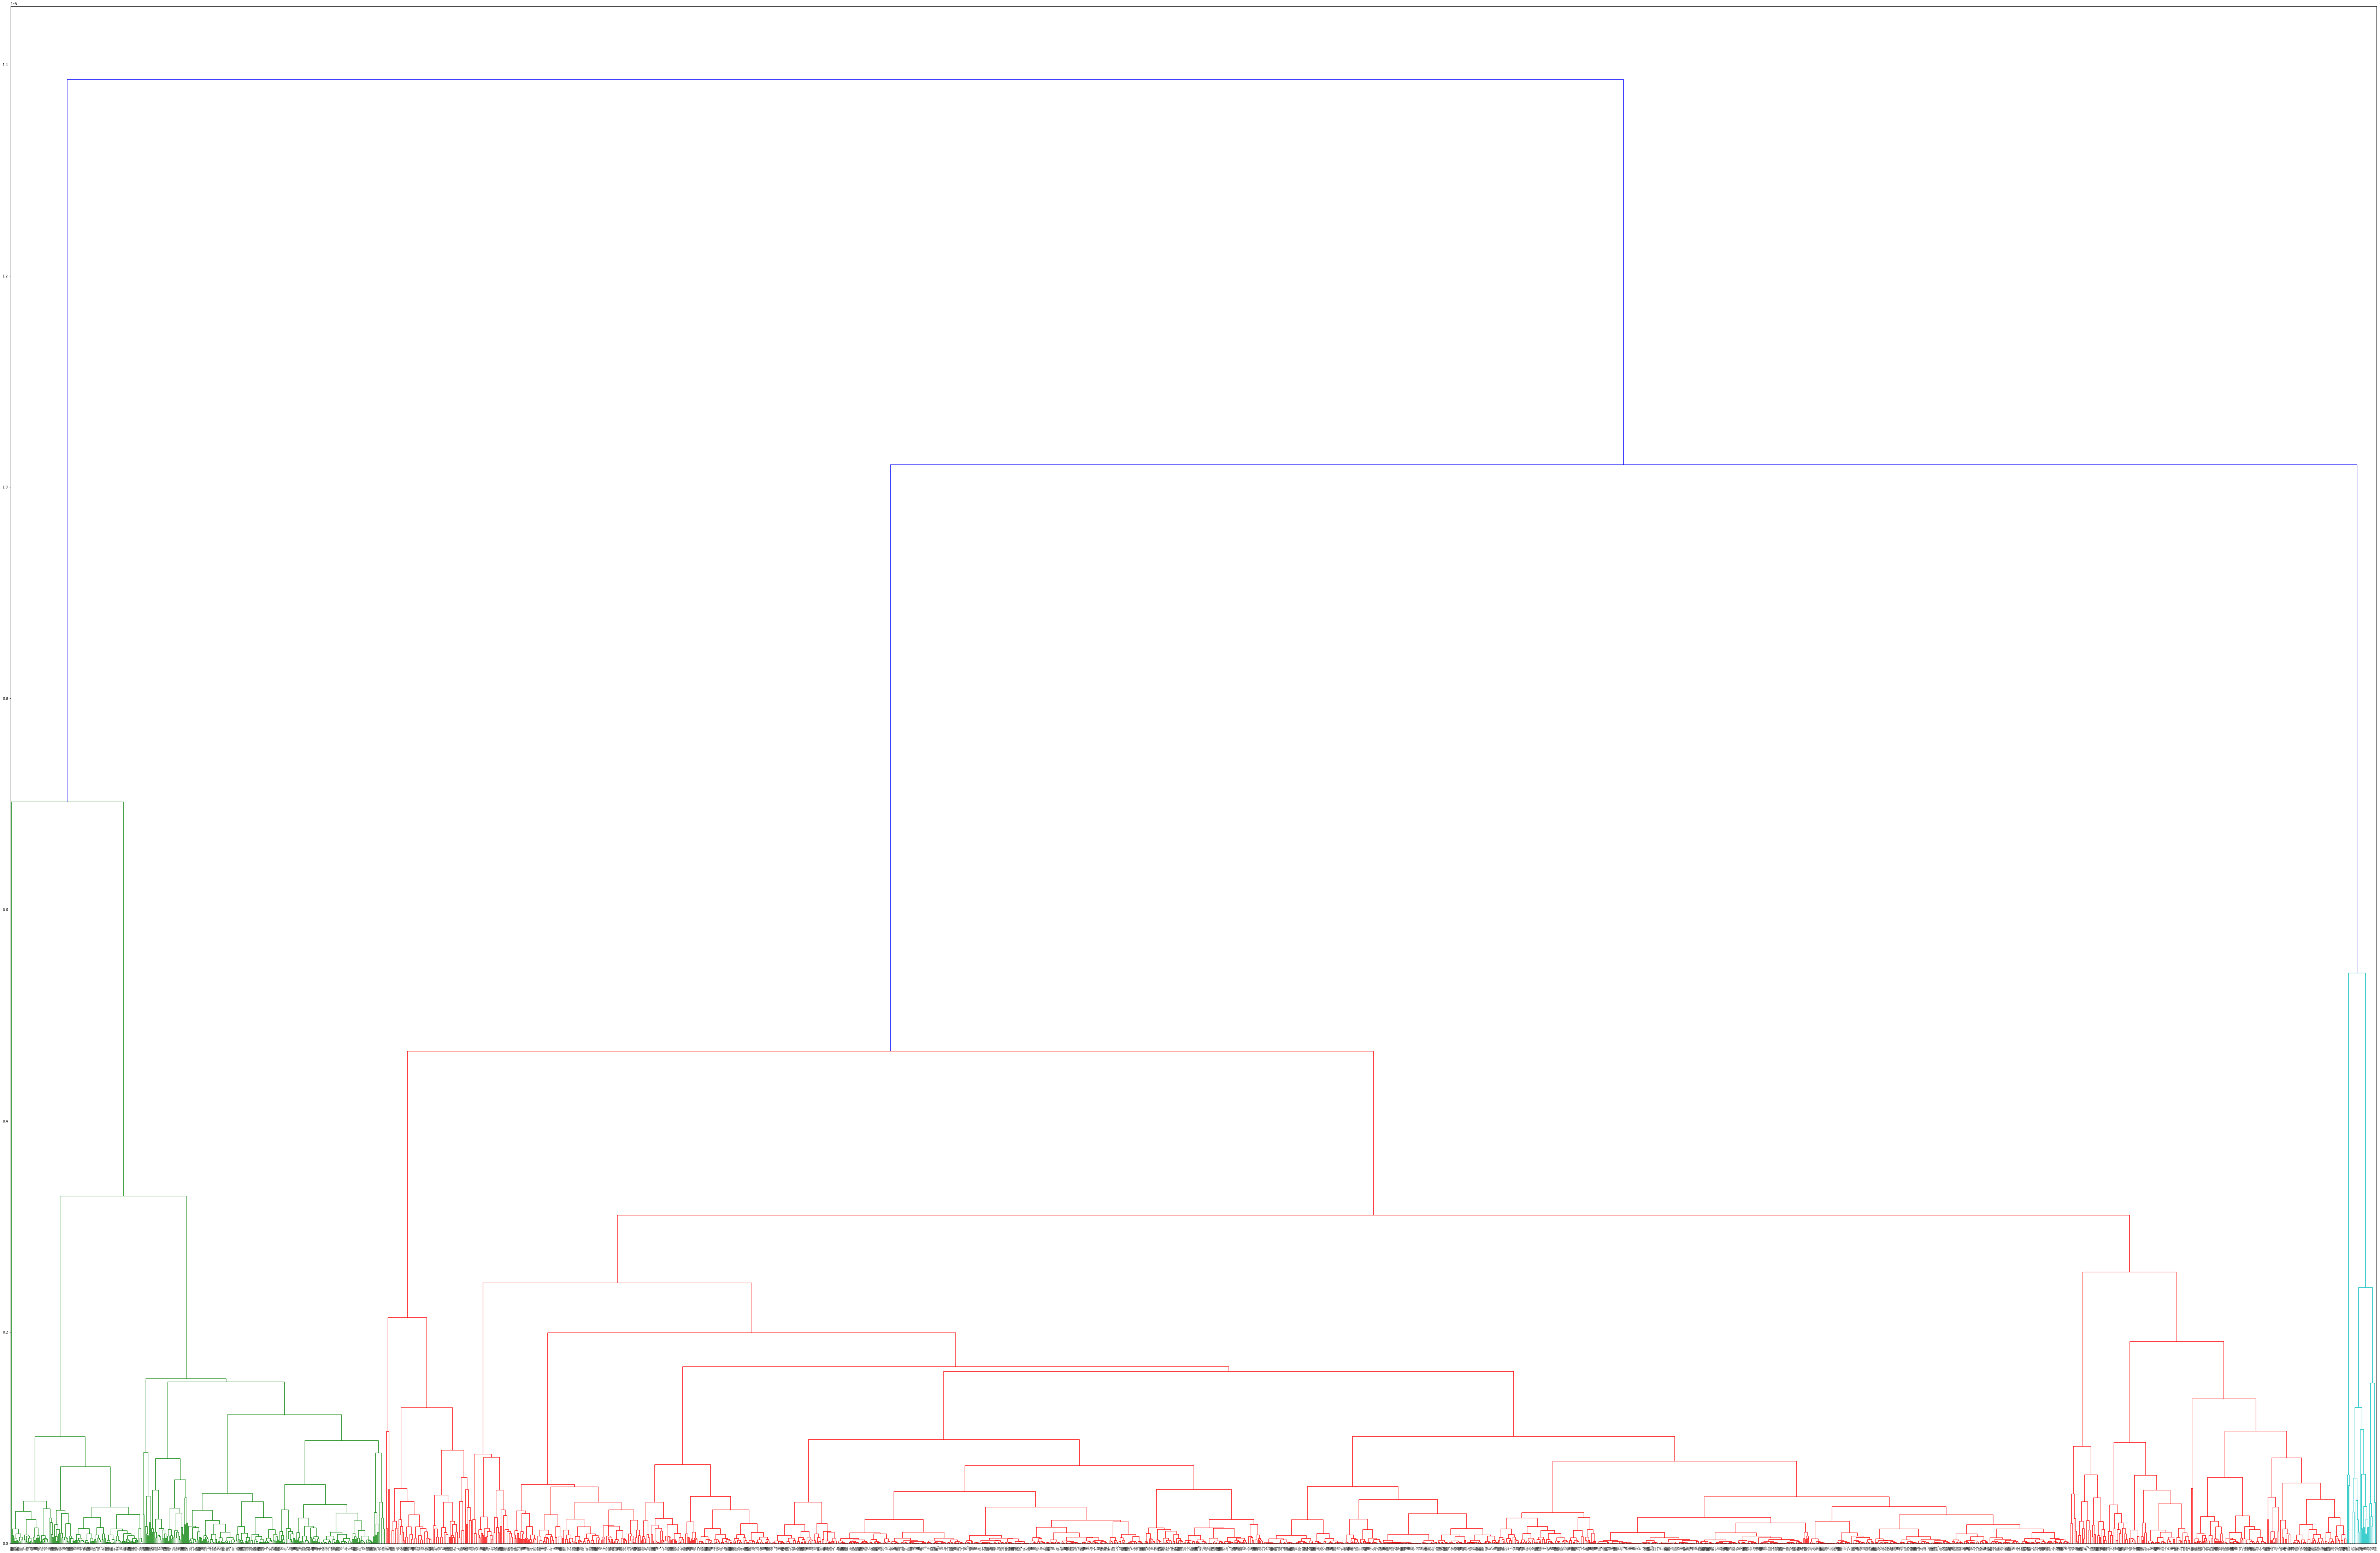

In [50]:
#Grafico del dendograma
plt.figure(figsize=(120, 80))
dendrogram(matrix)
plt.show()

In [79]:
#Formacion de los clusters a traves del clustering jerarquico aglomerativo
num_clusters=3
labels = pnd.DataFrame(fcluster(matrix, num_clusters, criterion='maxclust'))
for i in range(len(labels)):
    print X.axes[0][i],labels[0][i]

 0 2
1 3
2 2
3 2
4 2
5 2
6 2
7 2
8 2
9 2
10 2
11 2
12 2
13 2
14 2
15 2
16 1
17 2
18 2
19 2
20 2
21 2
22 1
23 2
24 2
25 2
26 2
27 1
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 1
38 2
39 2
40 1
41 2
42 2
43 1
44 2
45 2
46 2
47 1
48 1
49 1
50 2
51 2
52 2
53 2
54 2
55 2
56 2
57 1
58 2
59 2
60 2
61 2
62 1
63 2
64 2
65 2
66 1
67 2
68 2
69 2
70 2
71 2
72 2
73 2
74 2
75 2
76 2
77 2
78 2
79 2
80 2
81 2
82 2
83 2
84 2
85 2
86 2
87 1
88 2
89 1
90 2
91 2
92 2
93 1
94 2
95 1
96 2
97 2
98 2
99 2
100 2
101 2
103 2
104 2
105 2
106 2
107 2
108 1
109 2
110 2
111 2
112 2
113 1
114 2
115 2
116 2
117 2
118 2
119 1
120 2
121 1
122 2
123 2
124 2
125 2
126 2
127 2
128 2
129 2
130 2
131 2
132 2
133 1
134 2
135 2
136 2
137 2
138 2
139 2
140 2
141 2
142 2
143 1
144 2
145 2
146 1
147 2
148 2
149 2
150 2
151 2
152 2
153 2
154 2
155 2
156 2
157 2
158 2
159 2
160 2
161 2
162 1
163 2
164 2
165 2
166 1
167 2
168 2
169 2
170 2
171 2
172 2
173 2
174 2
175 1
176 2
177 2
178 2
179 2
180 1
181 2
183 1
184 2
185 2
186 2

1546 2
1547 2
1548 2
1549 2
1550 2
1551 2
1552 2
1553 2
1554 2
1555 1
1556 2
1557 2
1558 2
1559 2
1560 2
1561 2
1562 2
1563 2
1564 2
1565 2
1566 2
1568 2
1569 2
1570 2
1571 2
1572 2
1573 2
1574 2
1575 2
1576 2
1577 2
1578 1
1579 2
1580 2
1581 2
1582 2
1583 2
1585 1
1586 2
1587 2
1588 2
1589 1
1590 1
1591 2
1592 2
1593 2
1595 1
1596 2
1598 2
1599 2
1600 2
1601 1
1602 2
1603 2
1604 2
1605 1
1606 1
1607 2
1608 2
1609 2
1610 2
1611 2
1612 2
1613 2
1614 2
1615 2
1616 2
1617 2
1618 2
1619 2
1620 2
1621 2
1622 2
1623 2
1624 2
1625 2
1626 2
1627 2
1628 1
1629 2
1630 2
1631 2
1633 2
1634 2
1635 2
1636 2
1637 2
1638 1
1639 1
1640 2
1641 2
1642 2
1643 2
1644 2
1645 2
1646 2
1647 2
1648 2
1649 2
1650 2
1651 2
1652 2
1653 2
1654 1
1655 2
1656 2
1657 2
1658 2
1659 2
1660 2
1661 1
1662 2
1663 2
1664 2
1665 2
1666 2
1667 2
1668 2
1669 2
1670 2
1671 1
1673 2
1674 2
1675 2
1676 2
1677 2
1678 1
1679 2
1680 2
1681 2
1682 2
1683 2
1684 2
1685 1
1686 2
1687 2
1688 2
1689 2
1690 1
1691 2
1692 2
1693 2
1694 2

In [55]:
#Reduccion de dimensionalidad de los datos mediante t-distributed Stochastic Neighbor Embedding.
X_embedded = TSNE(n_components=2).fit_transform(X)

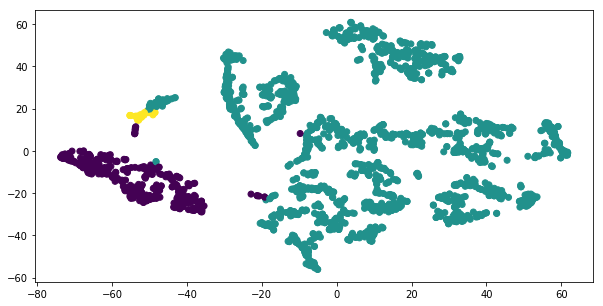

In [56]:
#Grafico de los datos en 2d con las etiquetas
plt.figure(figsize=(10, 5))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels) #Se agregan los labels de los clusters
plt.show()

In [58]:
#Normalización de los datos
scaler=StandardScaler()
scaler.fit(X)
X_norm=scaler.transform(X)

In [70]:
#Clusters con KMeans
clusterer = KMeans(n_clusters=15, random_state=10)
cluster_labels = clusterer.fit_predict(X_norm)

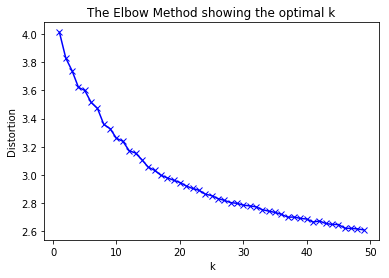

In [61]:

#Kmeans
# k means determine k
distortions = []
K = range(1,50)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_norm)
    kmeanModel.fit(X_norm)
    distortions.append(sum(np.min(cdist(X_norm, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_norm.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [67]:
#Visualizacion de los datos mediante t-distributed Stochastic Neighbor Embedding con datos normalizados.
X_embedded_kmeans = TSNE(n_components=2).fit_transform(X_norm)

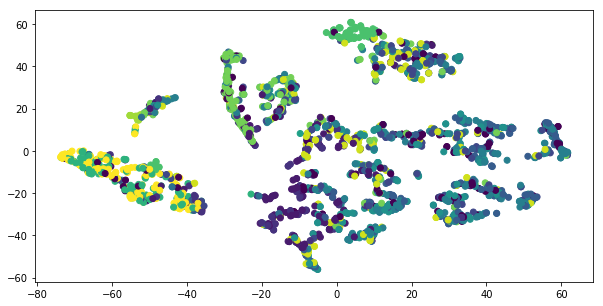

In [74]:
#etiquetas de KMeans
plt.figure(figsize=(10, 5))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=cluster_labels) #Se agregan los labels de los clusters
plt.show()

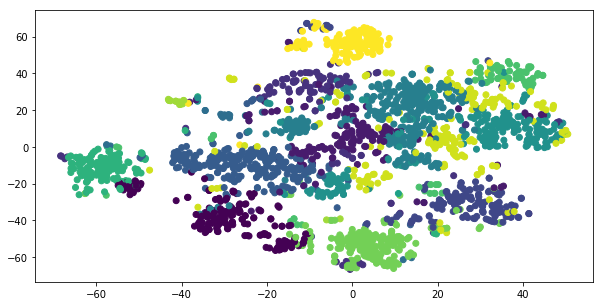

In [75]:
#etiquetas de KMeans
plt.figure(figsize=(10, 5))
plt.scatter(X_embedded_kmeans[:, 0], X_embedded_kmeans[:, 1], c=cluster_labels) #Se agregan los labels de los clusters
plt.show()

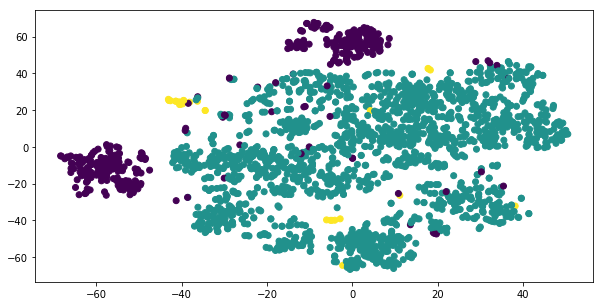

In [73]:
#etiquetas de aglomerativo
plt.figure(figsize=(10, 5))
plt.scatter(X_embedded_kmeans[:, 0], X_embedded_kmeans[:, 1], c=labels) #Se agregan los labels de los clusters
plt.show()

In [80]:
cluster_res = X.copy()
cluster_res['labels'] = labels.copy()

In [86]:
cluster_1 = cluster_res[cluster_res['labels'] == 1]
cluster_2 = cluster_res[cluster_res['labels'] == 2]
cluster_3 = cluster_res[cluster_res['labels'] == 3]

In [90]:
cluster_3

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,Crédito_1,Crédito_2,Crédito_3,Crédito_4,Monto solicitado,Días de Mora,Monto Deuda Promedio,Número de meses inactivo,numero de cuotas,Aval,labels
1,2,0,1200000.0,59.0,0,0,121,0,0,0,0,27797549.0,0,16.0,0,34519,1,60,0,3.0
209,210,1,450000.0,52.0,2,2,35,42,1,0,450000,0.0,400000,0.0,0,16,1,14,0,3.0
260,261,1,750000.0,52.0,1,0,35,37,1,1036913,12456,0.0,1071651,1657.0,0,10197,1,21,0,3.0
399,400,1,1200000.0,47.0,0,0,138,2,2,0,260,0.0,938160,2850.0,2,897,2,32,0,3.0
432,433,0,66900.0,39.0,0,2,90,7,1,0,0,0.0,0,503.0,0,0,1,80,1,3.0
606,607,1,7000000.0,43.0,2,3,90,7,1,0,0,4965038.0,0,2.0,14,5382,1,26,0,3.0
614,615,0,77800.0,34.0,1,1,72,43,24,0,239087,0.0,480359,618.0,0,489,1,35,1,3.0
627,628,1,616000.0,47.0,1,0,138,2,2,0,300000,0.0,0,0.0,0,16043,1,22,1,3.0
759,760,1,599000.0,43.0,0,0,31,8,1,0,244595,0.0,250000,313.0,0,1125,1,21,1,3.0
807,808,0,4920000.0,32.0,1,2,57,74,1,0,962381,0.0,900000,140.0,36,303,1,19,1,3.0


In [91]:
#Guardar dataset limpio en nuevo archivo excel para análisis con tableau o excel
cluster_res.to_excel(path + "limpio_labels.xlsx")